In [63]:
from classy import Class
from pylab import *
import numpy as np
import matplotlib.pyplot as plt

In [91]:
paramsGO = {
    'H0': 67.69 , 
    'T_cmb': 2.725,
    'omega_b': 0.02245,
    'omega_cdm': 0.1197,
    'n_s': 0.9718,
    'ln10^{10}A_s': 3.0335,
    'tau_reio': 0.0508,
    'Omega_Lambda': 0.,
    'Omega_k': 0.,
    'fluid_equation_of_state': 'GO',
    'alpha_GO': 0.96,
    'beta_GO': 0.48,
    'gauge': 'newtonian', 
    'use_ppf': 'no',
    'const_cs2': 'yes',
    'cs2_fld' : 0.0,
    'P_k_max_1/Mpc':3.0,
    'k_output_values': '0.0001,0.01, 0.1',
    'evolver': 0, 
    'output': 'tCl,mPk'}

In [92]:
paramsLCDM = {
    'H0': 67.69 , 
    'T_cmb': 2.725,
    'omega_b': 0.02245,
    'omega_cdm': 0.1197,
    'n_s': 0.9718,
    'ln10^{10}A_s': 3.0335,
    'tau_reio': 0.0508,
    'Omega_fld': 0.,
    'Omega_k': 0.,
    'gauge': 'newtonian', 
    'P_k_max_1/Mpc':3.0,
    'k_output_values': '0.0001,0.01, 0.1',
    'output': 'tCl,mPk'}

In [93]:
cosmo = Class() ; lCDM = Class() ; cosmo2 = Class()

In [94]:
GO3 = Class(); GO4 = Class(); 

In [95]:
cosmo.set(paramsGO); lCDM.set(paramsLCDM)

True

In [96]:
paramsGO3= paramsGO.copy();   paramsGO3['cs2_fld'] = 1.0 ; GO3.set(paramsGO3)

True

In [129]:
paramsGO4= paramsGO.copy();   paramsGO4['cs2_fld'] = 0.2 ; GO4.set(paramsGO4)

True

In [98]:
paramsGO2= paramsGO.copy(); paramsGO2.pop('cs2_fld')  ; paramsGO2['const_cs2'] = 'no'; cosmo2.set(paramsGO2)

True

In [99]:
cosmo.compute()

In [100]:
cosmo2.compute()

In [101]:
GO3.compute()

In [130]:
GO4.compute()

In [103]:
lCDM.compute()

In [104]:
matplotlib.rcParams['xtick.direction'] = "in"
matplotlib.rcParams['ytick.direction'] = "in"

In [105]:
Cl_GO= cosmo.raw_cl();l=Cl_GO["ell"]; Cl=Cl_GO["tt"]; 

In [106]:
Cl_GO2= cosmo2.raw_cl();l2=Cl_GO2["ell"]; Cl2=Cl_GO2["tt"]; 

In [107]:
Cl_GO3= GO3.raw_cl();l3=Cl_GO3["ell"]; Cl3=Cl_GO3["tt"]; 

In [131]:
Cl_GO4= GO4.raw_cl();l4=Cl_GO4["ell"]; Cl4=Cl_GO4["tt"]; 

In [109]:
Cl_lcdm= lCDM.raw_cl(); ldm=Cl_lcdm["ell"]; Cldm=Cl_lcdm["tt"]; 

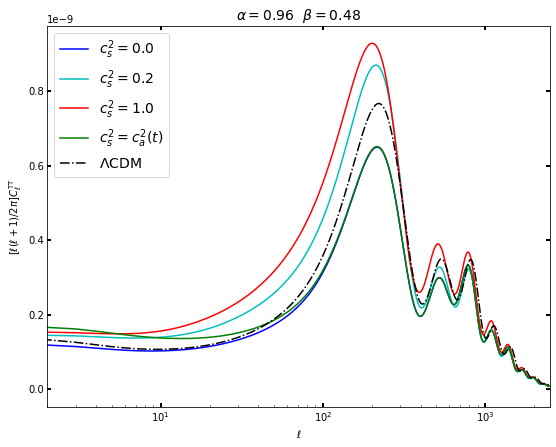

In [134]:
plt.figure(figsize=(9,7))
plt.figure(1)
plot(l,l*(l+1.)/2/pi*Cl,'b-')
plot(l4,l4*(l4+1.)/2/pi*Cl4,'c-')
plot(l3,l3*(l3+1.)/2/pi*Cl3,'r-')

plot(l2,l2*(l2+1.)/2/pi*Cl2,'g-')
plot(ldm,ldm*(ldm+1.)/2/pi*Cldm,'k-.')

plt.xlim(2,2500)
plt.xlabel(r'$\ell$')
plt.ylabel(r'$[\ell(\ell+1)/2\pi]  C_\ell^\mathrm{TT}$')
#yscale('log'); 
xscale('log');
plt.legend(labels=[r'$c_{s}^{2}=0.0$',r'$c_{s}^{2}=0.2$',r'$c_{s}^{2}=1.0$',
                   r'$c_{s}^{2}= c_{a}^{2}(t)$', r'$\Lambda$CDM'],loc=2,prop={'size': 14})
plt.title(r'$\alpha = 0.96 \,\,\,\, \beta = 0.48 $',size=14)
plt.tick_params(direction='in', length=4, width=2, colors='k', right=True, top=True, 
                labelright='off',labeltop='off')
plt.savefig("cl_GO_cs2.pdf", format="pdf", dpi=2000)

In [122]:
kk = np.logspace(-6,np.log10(3),1000) # k in h/Mpc
Pk = []; Pk2 = []; Pk3 = []; Pk4 = [];
Pklcdm = [];  # P(k) in (Mpc/h)**3
h = cosmo.h() # get reduced Hubble for conversions to 1/Mpc
for k in kk:
    Pk.append(cosmo.pk(k*h,0.)*h**3) # function .pk(k,z)
    Pk2.append(cosmo2.pk(k*h,0.)*h**3)
    Pk3.append(GO3.pk(k*h,0.)*h**3)
    Pk4.append(GO4.pk(k*h,0.)*h**3)
    Pklcdm.append(lCDM.pk(k*h,0.)*h**3)

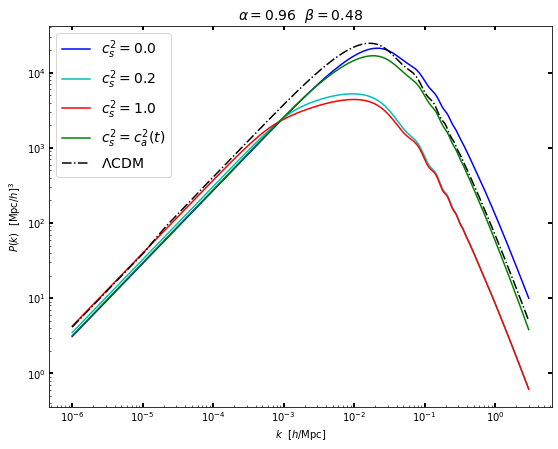

In [135]:
# plot P(k)
plt.figure(figsize=(9,7))
plt.xscale('log');plt.yscale('log'); #plt.xlim(kk[0],kk[-1])
plt.xlabel(r'$k \,\,\,\, [h/\mathrm{Mpc}]$')
plt.ylabel(r'$P(k) \,\,\,\, [\mathrm{Mpc}/h]^3$')

plt.plot(kk,Pk,'b-')
plt.plot(kk,Pk4,'c-')
plt.plot(kk,Pk3,'r-')

plt.plot(kk,Pk2,'g-')
plt.plot(kk,Pklcdm,'k-.')

plt.legend(labels=[r'$c_{s}^{2}=0.0$',r'$c_{s}^{2}=0.2$',r'$c_{s}^{2}=1.0$',
                   r'$c_{s}^{2}= c_{a}^{2}(t)$', r'$\Lambda$CDM'],loc=2,prop={'size': 14})
plt.title(r'$\alpha = 0.96 \,\,\,\, \beta = 0.48 $',size=14)
plt.tick_params(direction='in', length=4, width=2, colors='k', right=True, top=True, 
                labelright='off',labeltop='off')
plt.savefig("pk_GO_cs2.pdf", format="pdf", dpi=2000)